In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv


In [2]:
#Import required libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk 



In [3]:
#load the dataset
df= pd.read_csv("/kaggle/input/multilingual-mobile-app-reviews-dataset-2025/multilingual_mobile_app_reviews_2025.csv")

In [4]:
df.head()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


In [5]:
#shape of the data
df.shape

(2514, 15)

In [6]:
df.columns

Index(['review_id', 'user_id', 'app_name', 'app_category', 'review_text',
       'review_language', 'rating', 'review_date', 'verified_purchase',
       'device_type', 'num_helpful_votes', 'user_age', 'user_country',
       'user_gender', 'app_version'],
      dtype='object')

In [7]:
#Review By App Category
df['app_category'].value_counts()

app_category
Entertainment              167
Navigation                 161
Travel & Local             159
Health & Fitness           155
Music & Audio              152
Business                   150
Dating                     140
Productivity               140
Social Networking          139
Video Players & Editors    139
Communication              137
Shopping                   137
Education                  136
News & Magazines           133
Finance                    128
Games                      117
Utilities                  115
Photography                109
Name: count, dtype: int64

In [8]:
df['app_name'].value_counts()

app_name
Pinterest           80
Reddit              80
Google Drive        76
OneDrive            74
MX Player           72
Instagram           72
Dropbox             70
Telegram            68
Microsoft Office    68
Adobe Photoshop     68
Grammarly           66
YouTube             66
Airbnb              65
Uber                64
Waze                64
Google Maps         63
TikTok              63
Netflix             62
Booking.com         62
Tinder              62
PayPal              61
Zoom                60
Coursera            59
Twitter             59
WhatsApp            59
Canva               57
Duolingo            57
eBay                57
LinkedIn            56
Bumble              56
Signal              56
Lyft                55
Amazon              54
Khan Academy        54
Udemy               52
Facebook            52
Spotify             51
Snapchat            51
Venmo               50
VLC                 49
Discord             44
Name: count, dtype: int64

In [9]:
#find the missing values
df.isnull().sum()

review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64

In [10]:
#types of data variables
df.dtypes

review_id              int64
user_id                int64
app_name              object
app_category          object
review_text           object
review_language       object
rating               float64
review_date           object
verified_purchase       bool
device_type           object
num_helpful_votes      int64
user_age             float64
user_country          object
user_gender           object
app_version           object
dtype: object

In [11]:
#find the missing values from every category
df[df["review_text"].isna()]["app_category"].value_counts()

app_category
Navigation                 6
Dating                     6
Communication              5
Music & Audio              5
Video Players & Editors    4
Business                   4
Games                      4
Shopping                   4
Health & Fitness           4
Productivity               3
Travel & Local             3
Entertainment              3
News & Magazines           2
Finance                    2
Photography                1
Utilities                  1
Education                  1
Social Networking          1
Name: count, dtype: int64

In [12]:
#Drop Missing Values 
df= df.dropna(subset= ['review_text','rating','app_version','user_country'])

In [13]:
df.isnull().sum()

review_id              0
user_id                0
app_name               0
app_category           0
review_text            0
review_language        0
rating                 0
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country           0
user_gender          547
app_version            0
dtype: int64

In [14]:
df['user_gender'].value_counts()

user_gender
Female               458
Non-binary           457
Male                 446
Prefer not to say    440
Name: count, dtype: int64

In [16]:
df['user_gender']= df['user_gender'].fillna('Unknown')

In [17]:
df.isnull().sum()

review_id            0
user_id              0
app_name             0
app_category         0
review_text          0
review_language      0
rating               0
review_date          0
verified_purchase    0
device_type          0
num_helpful_votes    0
user_age             0
user_country         0
user_gender          0
app_version          0
dtype: int64

In [18]:
#nesting of data
df['user_id']= df['user_id'].astype(int)
df['user_age']= df['user_age'].astype(int)
df['rating']= df['rating'].astype(int)
df['num_helpful_votes']= df['rating'].astype(int)

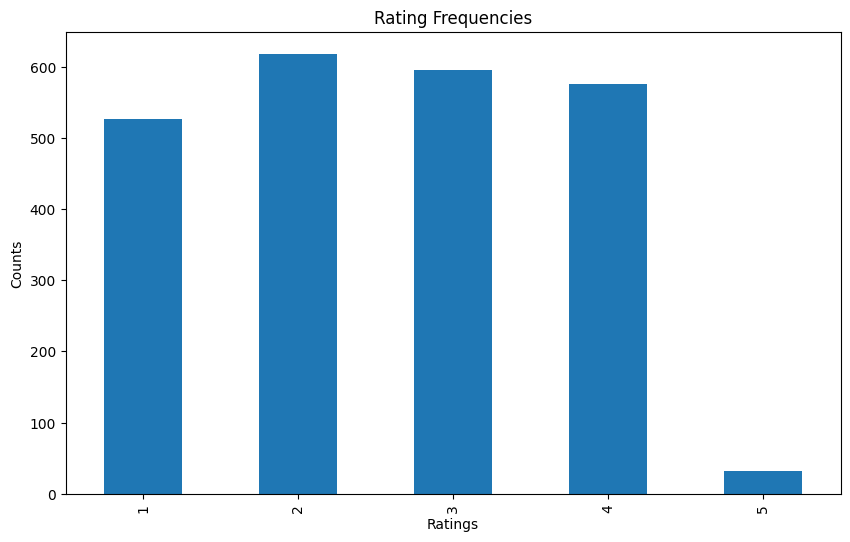

In [19]:
ax = df['rating'].value_counts().sort_index().plot(kind= 'bar', title= 'Rating Frequencies', figsize= (10,6))
ax.set_xlabel("Ratings")
ax.set_ylabel("Counts")
plt.show()

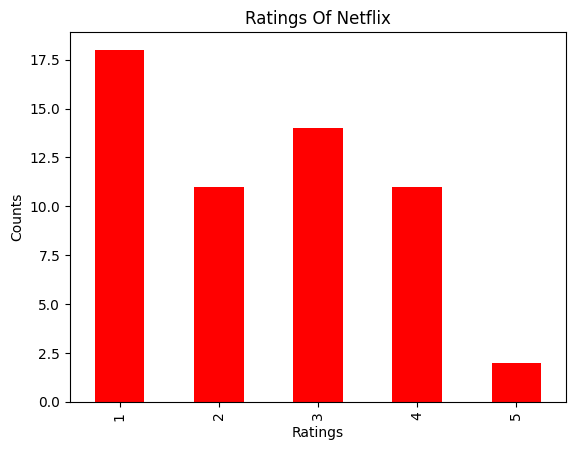

In [20]:
#Netflix_Ratings
netflix_rating= df[df['app_name']=='Netflix']

netflix_rating['rating'].value_counts().sort_index().plot(kind='bar', color= 'red')
plt.title("Ratings Of Netflix")
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.show() 

In [27]:
#Highest Five Star Ratings App

five_star_df= df[df['rating']==5]

five_star_counts= five_star_df['app_name'].value_counts()

top_app= five_star_counts.idxmax()
# top_count= five_star_counts.max()

print("app with highest five star ratings is -", top_app)
# print("number of five star ratings app-", top_count)

app with highest five star ratings is - Zoom


## Analysis By NLTK

In [28]:
text50= df['review_text'][50]
text50

'This app is amazing! Really love the new features.'

In [29]:
#Tokenize The Text
tokenize= nltk.word_tokenize(text50)
tokenize

['This',
 'app',
 'is',
 'amazing',
 '!',
 'Really',
 'love',
 'the',
 'new',
 'features',
 '.']

### VADER MODEL

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

sia= SentimentIntensityAnalyzer()

In [31]:
sia

In [32]:
sia.polarity_scores("I am happy today")

{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}

In [33]:
sia.polarity_scores("This Is So Weird")

{'neg': 0.399, 'neu': 0.601, 'pos': 0.0, 'compound': -0.2484}

In [34]:
#VADER MODEL Result
sia.polarity_scores(text50)

{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.862}

In [35]:
#run polarity_scores on all dataset

res={}
for i, row in tqdm(df.iterrows(), total= len(df)):
    text= row['review_text']
    myid= row['review_id']
    res[myid]= sia.polarity_scores(text)

  0%|          | 0/2348 [00:00<?, ?it/s]

In [36]:
vader_result= pd.DataFrame(res).T
vader_result= vader_result.reset_index().rename(columns= {'index':'review_id'})
vader_result= vader_result.merge(df, how= "left")

In [37]:
vader_result.head()


,review_id,neg,neu,pos,compound,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,0.000,1.000,0.000,0.0000,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1,2024-10-09 19:26:40,True,Android Tablet,1,14,China,Female,1.4
1,2,0.000,0.758,0.242,0.3716,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1,2024-06-21 17:29:40,True,iPad,1,18,Germany,Male,8.9
2,3,0.000,0.547,0.453,0.7003,7636477,Netflix,Dating,The interface could be better but overall good...,es,3,2024-10-31 13:47:12,True,iPad,3,67,Nigeria,Male,2.8.37.5926
3,4,0.252,0.541,0.207,-0.1280,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3,2025-03-12 06:16:22,True,iOS,3,66,India,Female,10.2
4,5,0.000,0.480,0.520,0.7574,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3,2024-04-21 03:48:27,True,iPad,3,40,South Korea,Prefer not to say,4.7


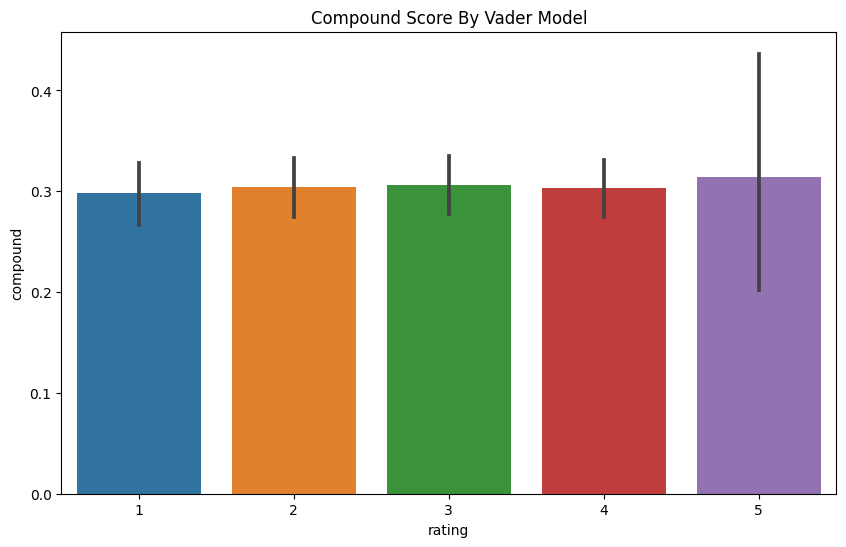

In [38]:
#plot the VADER Result
fig = plt.figure(figsize= (10,6))
ax = sns.barplot(data= vader_result, x= "rating", y= 'compound')
ax.set_title("Compound Score By Vader Model")
plt.show()


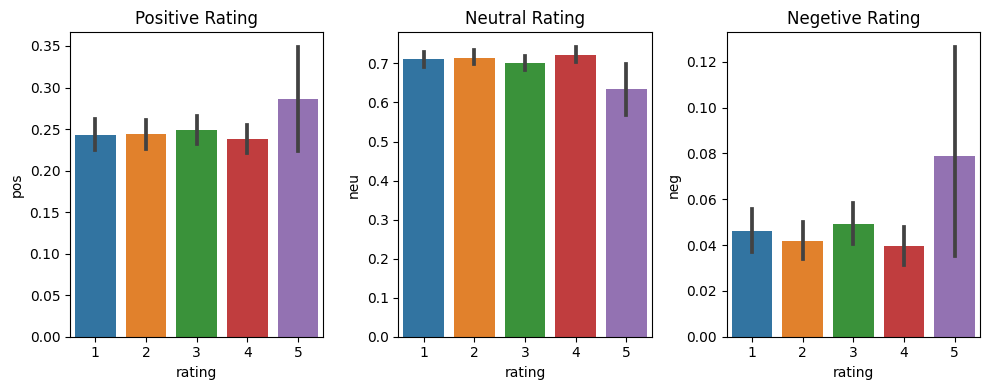

In [39]:
fig, axs= plt.subplots(1,3, figsize= (10,4))

sns.barplot(data= vader_result,x= "rating", y= "pos", ax= axs[0])
sns.barplot(data= vader_result,x= "rating", y= "neu", ax= axs[1])
sns.barplot(data= vader_result,x= "rating", y= "neg", ax= axs[2])

axs[0].set_title("Positive Rating")
axs[1].set_title("Neutral Rating")
axs[2].set_title("Negetive Rating")

plt.tight_layout()
plt.show()

                       

## ROBERTA Pretrained Model

In [41]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [43]:
#Hugging Face Pretrained Model
MODEL= "tabularisai/multilingual-sentiment-analysis"
tokenizer= AutoTokenizer.from_pretrained(MODEL)
model= AutoModelForSequenceClassification.from_pretrained(MODEL)

In [44]:
#VADER result on text50
print(text50)
sia.polarity_scores(text50)


This app is amazing! Really love the new features.


{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.862}

In [45]:
#ROBERTA result on text50
encoded_text= tokenizer(text50, return_tensors= 'pt')
output= model(**encoded_text)
scores= output[0][0].detach().numpy()
scores= softmax(scores)

#the model that we used is a five class model we need neutral mapping
#to convert it into three class 
#neutral mapping 
neg= scores[0]+scores[1]    #very_negetive + negetive
neu= scores[2]              #neutral
pos= scores[3]+scores[4]    #very_positive + positive 

mapped_scores= {
    "roberta_neg": float(neg),
    "roberta_neu": float(neu),
    "roberta_pos": float(pos)
    
}

print(mapped_scores) 

{'roberta_neg': 0.03568122908473015, 'roberta_neu': 0.029008937999606133, 'roberta_pos': 0.935309886932373}


In [46]:
def roberta_polarity_score(text50):
    encoded_text= tokenizer(text50, return_tensors= 'pt')
    output= model(**encoded_text)
    scores= output[0][0].detach().numpy()
    scores= softmax(scores)

    #neutral mapping 
    neg= scores[0]+scores[1]    #very_negetive + negetive
    neu= scores[2]              #neutral
    pos= scores[3]+scores[4]    #very_positive + positive 

    mapped_scores= {
       "roberta_neg": float(neg),
       "roberta_neu": float(neu),
       "roberta_pos": float(pos)
    
}

    return mapped_scores


In [47]:
roberta_polarity_score(text50)

{'roberta_neg': 0.03568122908473015,
 'roberta_neu': 0.029008937999606133,
 'roberta_pos': 0.935309886932373}

In [48]:
#run roberta polarity scores on all dataset
res= {}
for i, row in tqdm(df.iterrows(), total= len(df)):
    text= row['review_text']
    myid= row['review_id']
    vader_result= sia.polarity_scores(text)
    vader_result_rename= {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"]= value
    roberta_result= roberta_polarity_score(text)
    both= {**vader_result_rename, **roberta_result}
    res[myid]= both

  0%|          | 0/2348 [00:00<?, ?it/s]

In [49]:
#merge the results
result_df= pd.DataFrame(res).T
result_df= result_df.reset_index().rename(columns= {'index':'review_id'})
result_df= result_df.merge(df, how= 'left')
result_df

,review_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,user_id,app_name,...,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,0.000,1.000,0.000,0.0000,0.046290,0.872390,0.081320,1967825,MX Player,...,no,1,2024-10-09 19:26:40,True,Android Tablet,1,14,China,Female,1.4
1,2,0.000,0.758,0.242,0.3716,0.872502,0.038385,0.089113,9242600,Tinder,...,ru,1,2024-06-21 17:29:40,True,iPad,1,18,Germany,Male,8.9
2,3,0.000,0.547,0.453,0.7003,0.856262,0.024861,0.118877,7636477,Netflix,...,es,3,2024-10-31 13:47:12,True,iPad,3,67,Nigeria,Male,2.8.37.5926
3,4,0.252,0.541,0.207,-0.1280,0.876132,0.029523,0.094345,209031,Venmo,...,vi,3,2025-03-12 06:16:22,True,iOS,3,66,India,Female,10.2
4,5,0.000,0.480,0.520,0.7574,0.034033,0.033987,0.931980,7190293,Google Drive,...,tl,3,2024-04-21 03:48:27,True,iPad,3,40,South Korea,Prefer not to say,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,2510,0.000,1.000,0.000,0.0000,0.909741,0.052285,0.037974,2322118,OneDrive,...,nl,3,2023-11-23 01:07:30,False,iOS,3,21,Malaysia,Non-binary,1.1.2-beta
2344,2511,0.000,0.449,0.551,0.8620,0.035681,0.029009,0.935310,2167693,Signal,...,ms,1,2025-06-05 16:42:20,True,Windows Phone,1,38,Bangladesh,Unknown,v12.0.80
2345,2512,0.000,0.449,0.551,0.8620,0.035681,0.029009,0.935310,5554467,OneDrive,...,zh,3,2024-06-15 05:02:18,True,Android Tablet,3,27,Pakistan,Unknown,9.1.32.4821
2346,2513,0.000,1.000,0.000,0.0000,0.444794,0.502225,0.052981,8805125,Coursera,...,da,2,2023-12-02 01:41:31,True,Android,2,35,India,Unknown,v8.9.13


In [50]:
result_df.columns

Index(['review_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'user_id', 'app_name',
       'app_category', 'review_text', 'review_language', 'rating',
       'review_date', 'verified_purchase', 'device_type', 'num_helpful_votes',
       'user_age', 'user_country', 'user_gender', 'app_version'],
      dtype='object')

## Combine And Compare

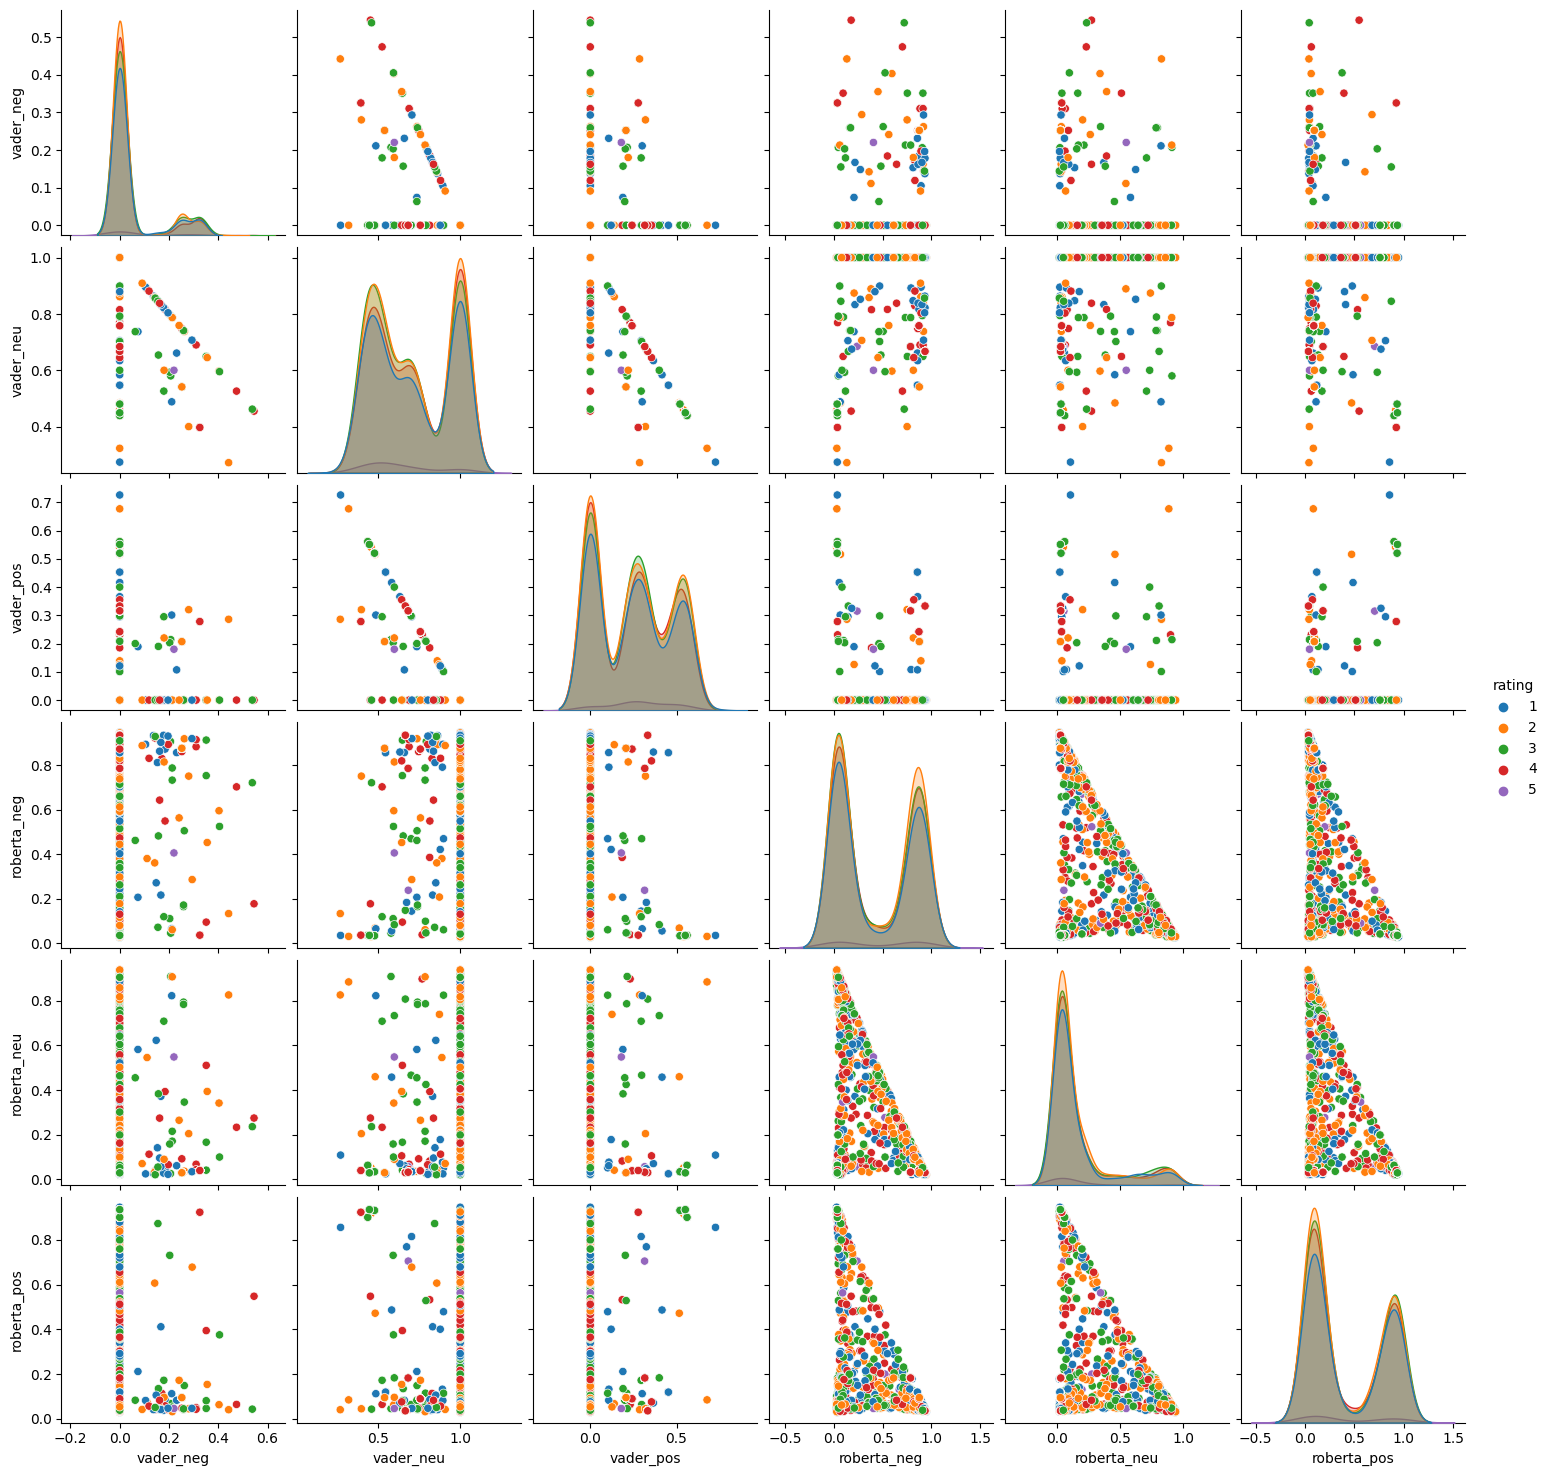

In [51]:
import warnings
warnings.filterwarnings("ignore", category= FutureWarning, module= "seaborn")
warnings.filterwarnings("ignore", category= UserWarning, module= "seaborn")

sns.pairplot(data= result_df,
             vars= ['vader_neg', 'vader_neu', 'vader_pos',
                    'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue= 'rating',
            palette= 'tab10')
plt.show()

## Review Example

In [52]:
#Positive Review with 1 star rating by ROBERTA Model 
result_df.query('rating==1').sort_values('roberta_pos', ascending= False)['review_text'].values[0]

'Animer particulier accord chaleur ferme très plein discussion.'

In [53]:
#Negetive Review with 5 star rating by ROBERTA Model 
result_df.query('rating==5').sort_values('roberta_neg', ascending= False)['review_text'].values[0]

'Crashes too often, needs improvement in stability.'

In [54]:
#Positive Review with 1 star rating by VADER Model 
result_df.query('rating==1').sort_values('vader_pos')['review_text'].values[0]

'Qui doloribus consequuntur. Perspiciatis tempora assumenda in. Atque doloremque nobis.'

In [55]:
#Negetive Review with 5 star rating by VADER Model 
result_df.query('rating==5').sort_values('vader_neg')['review_text'].values[0]

'User-friendly design and smooth performance throughout.'

## Analysis By Hugging-Face Transformer Pipeline

In [58]:
from transformers import pipeline 
sentiment_pipeline= pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [59]:
sentiment_pipeline("I love this place")

[{'label': 'POSITIVE', 'score': 0.9998857975006104}]

In [60]:
sentiment_pipeline("i hate chicken foods")

[{'label': 'NEGATIVE', 'score': 0.990844190120697}]

In [61]:
sentiment_pipeline("text50")

[{'label': 'NEGATIVE', 'score': 0.7333386540412903}]